# GaN Capture Coefficients

We want to compare the GaN capture coefficients with the Alkauskas results and see what the effect of different phonons is on the results. The transition rate is calculated for and plotted over a range of temperatures. I calculated the results using each of the different sets of phonons and using different initial and final frequencies. We also calculate the top 3 bands and combine them using a weighted average with the Boltzmann factor as a weight. Note that it doesn't matter which of the energies we use here because the weights are normalized and only the difference between the bands matters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib import rc
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('font', **{'family': 'serif', 'serif': ['Times']})
rc('text', usetex=True)

kB = 8.617333262e-5 # eV/K
volume = 7.454280777403304E+003*(5.2918e-9)**3 # Bohr^3 to cm^3
HBAR = 6.582e-16  # Planck constant divided by 2π, in eV·s
A = np.array([9.6000003814999992,11.0851259231999997,10.3800001143999996])
A_CM = A*1e-8  # Unit: cm
DK = 2*np.pi/A_CM  # Unit: cm^-1

## Plot for comparison with Alkauskas *et al.*

The most accurate results are the two-frequency results using the ground-state eigenvalues to adjust between the bands. Guanzhi generated the finalized plot for the paper with the Alkauskas *et al.* curve and experimental results. 

In [2]:
T = np.array([50, 100, 200, 300, 400, 500, 600, 700, 800])
Wif_ground = np.array([-1.17234116, -0.94487016, -0.92051316])

weight3rdDown_ground = np.exp(Wif_ground[0]/(kB*T))
weight2ndDown_ground = np.exp(Wif_ground[1]/(kB*T))
weightVBM_ground = np.exp(Wif_ground[2]/(kB*T))

totalWeight_ground = weight3rdDown_ground + weight2ndDown_ground + weightVBM_ground

weight3rdDown_ground /= totalWeight_ground
weight2ndDown_ground /= totalWeight_ground
weightVBM_ground /= totalWeight_ground

In [3]:
Cp_twoFreq_3rdDown_ground = 4*np.array([5.47521088209500E+010,5.65786739029685E+010,6.93900713631608E+010,9.73761185639832E+010,1.48429738320775E+011,2.33679705988653E+011,3.66225296555039E+011,5.59733098146519E+011,8.26939029040183E+011])*volume*weight3rdDown_ground
Cp_twoFreq_2ndDown_ground = 4*np.array([9.65431875652223E+012,1.02368776458144E+013,1.34947470563925E+013,1.95035420734787E+013,2.84228655221035E+013,4.03779777424839E+013,5.53985235424727E+013,7.33920143521490E+013,9.41575481544371E+013])*volume*weight2ndDown_ground
Cp_twoFreq_VBM_ground = 4*np.array([4.35602099991288E+012,4.62233993398383E+012,6.20351591697467E+012,9.17901809174945E+012,1.36515285329702E+013,1.97141399128498E+013,2.74006866942841E+013,3.66678781739982E+013,4.74060369542746E+013])*volume*weightVBM_ground
Cp_twoFreq_ground = Cp_twoFreq_3rdDown_ground + Cp_twoFreq_2ndDown_ground + Cp_twoFreq_VBM_ground

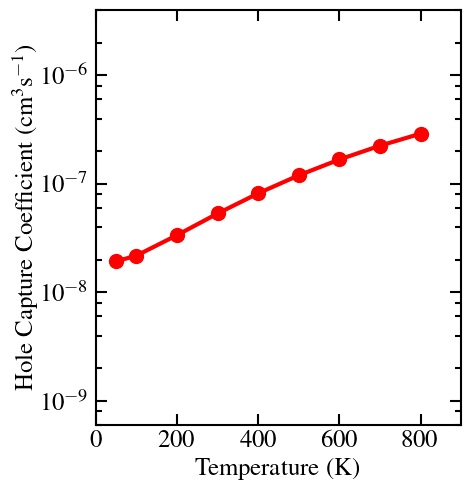

In [4]:
plt.figure(figsize=(5,5))

# Paper figure with smeared results
plt.semilogy(T, Cp_twoFreq_ground, color='red', linewidth=3, marker='o', markersize=10)

# Labels
plt.xlabel('Temperature (K)', fontsize=18)
plt.ylabel('Hole Capture Coefficient (cm$^3$s$^{-1}$)', fontsize=18)

# Plot formatting
#plt.legend(loc='lower right', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=18)  # Increase x-axis tick font size
plt.yticks(fontsize=18)  # Increase y-axis tick font size
plt.ylim(6e-10,4e-6)
plt.xlim(0,900)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.tight_layout()
#plt.savefig('FirstTDep.png',dpi=1200)
plt.show()

### Sommerfeld parameter

We argue in the paper that the Sommerfeld parameter is not needed because we use wave functions from the ground-state configuration with a neutral defect. However, we wanted to show the referee what the results would be using the Sommerfeld parameter from the Alkauskas paper. They say that they use $f(T) = 150/\sqrt{T}$.

In [5]:
150/np.sqrt(50)

21.213203435596427

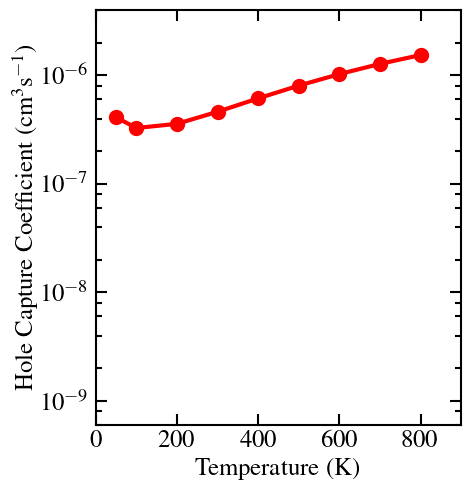

In [6]:
plt.figure(figsize=(5,5))

s = 150/np.sqrt(T)

# Paper figure with smeared results
plt.semilogy(T, Cp_twoFreq_ground*s, color='red', linewidth=3, marker='o', markersize=10)

# Labels
plt.xlabel('Temperature (K)', fontsize=18)
plt.ylabel('Hole Capture Coefficient (cm$^3$s$^{-1}$)', fontsize=18)

# Plot formatting
#plt.legend(loc='lower right', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=18)  # Increase x-axis tick font size
plt.yticks(fontsize=18)  # Increase y-axis tick font size
plt.ylim(6e-10,4e-6)
plt.xlim(0,900)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig('WSommerfeld.png',dpi=1200)
plt.show()

### Zeroth-order 

We decided to take the zeroth-order term off of the plot of temperature because it doesn't make sense to plot the fundamentally nonequilibrium zeroth-order term as a function of temperature with the bands averaged as in the first-order term. It would also make the comparison to previous results confusing. Instead, we wanted to be able to plot the nonequilibrium terms as a function of energy (see the `Nonequilibrium` section in this notebook), but we would need more k-points and decided that that calculation was outside the scope of this paper. 

Because we included the zeroth-order term in our first submission, we included the curve in the referee response letter to make it clear that we did not remove it because the results were no longer favorable. The zeroth-order term would actually match up with experiment very well if it made any sense.

In [7]:
T = np.array([50, 100, 200, 300, 400, 500, 600, 700, 800])
Wif_noneq0 = np.array([-7.78065160E-01, -7.92112160E-01, -7.97878160E-01])

weight3rdDown_noneq0 = np.exp(Wif_noneq0[0]/(kB*T))
weight2ndDown_noneq0 = np.exp(Wif_noneq0[1]/(kB*T))
weightVBM_noneq0 = np.exp(Wif_noneq0[2]/(kB*T))

totalWeight_noneq0 = weight3rdDown_noneq0 + weight2ndDown_noneq0 + weightVBM_noneq0

weight3rdDown_noneq0 /= totalWeight_noneq0
weight2ndDown_noneq0 /= totalWeight_noneq0
weightVBM_noneq0 /= totalWeight_noneq0

In [8]:
Cp_twoFreq_3rdDown_noneq0 = 4*np.array([3.70106155399785E+013,3.79756888949889E+013,4.45381856062886E+013,5.58179980256403E+013,7.02250278055131E+013,8.62260096934154E+013,1.02557626999616E+014,1.18327544633977E+014,1.32991634469084E+014])*volume*weight3rdDown_noneq0
Cp_twoFreq_2ndDown_noneq0 = 4*np.array([2.02556961992051E+013,2.07750171168746E+013,2.42963605745220E+013,3.03120158805982E+013,3.79389184624281E+013,4.63455748581272E+013,5.48632496691004E+013,6.30315363363902E+013,7.05785524372030E+013])*volume*weight2ndDown_noneq0
Cp_twoFreq_VBM_noneq0 = 4*np.array([5.91718735746454E+012,6.06240117561852E+012,7.04003697111550E+012,8.68517157654305E+012,1.07333656555852E+013,1.29490852758196E+013,1.51537425399009E+013,1.72321815040094E+013,1.91221461990364E+013])*volume*weightVBM_noneq0
Cp_twoFreq_noneq0 = Cp_twoFreq_3rdDown_noneq0 + Cp_twoFreq_2ndDown_noneq0 + Cp_twoFreq_VBM_noneq0

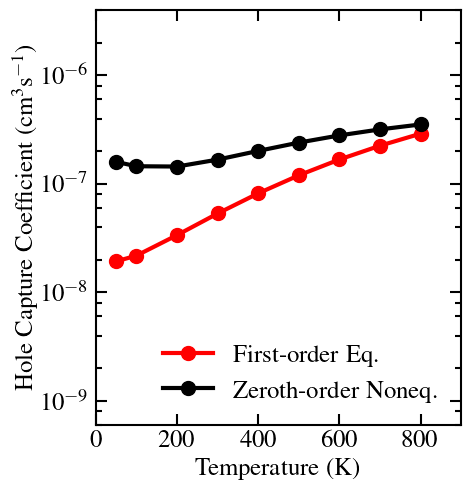

In [9]:
plt.figure(figsize=(5,5))

# Paper figure with smeared results
plt.semilogy(T, Cp_twoFreq_ground, color='red', label='First-order Eq.', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_twoFreq_noneq0, color='black', label='Zeroth-order Noneq.', linewidth=3, marker='o', markersize=10)

# Labels
plt.xlabel('Temperature (K)', fontsize=18)
plt.ylabel('Hole Capture Coefficient (cm$^3$s$^{-1}$)', fontsize=18)

# Plot formatting
plt.legend(loc='lower right', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=18)  # Increase x-axis tick font size
plt.yticks(fontsize=18)  # Increase y-axis tick font size
plt.ylim(6e-10,4e-6)
plt.xlim(0,900)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.tight_layout()
#plt.savefig('ZerothTDep.png',dpi=1200)
plt.show()

## Compare one- and two-frequency and ground vs excited-state energies

What is the effect of allowing the frequencies to change before and after capture? How sensitive are our results to the energies used?

We see that the results with and without the frequency change converge at low temperatures as expected. Allowing the frequencies to change decreases the temperature dependence. However, our results do not change significantly with changes in energies. 

In [10]:
Cp_oneFreq_3rdDown_ground = 4*np.array([6.19832021638047E+010,6.70030865257807E+010,8.77386375894091E+010,1.27386803477763E+011,1.97503033917433E+011,3.15710532973911E+011,5.04199819058450E+011,7.87047228015657E+011,1.18724435500990E+012])*volume*weight3rdDown_ground
Cp_oneFreq_2ndDown_ground = 4*np.array([1.89300001840317E+013,2.44911206471840E+013,4.23269302687059E+013,7.51394956668453E+013,1.30602276609377E+014,2.15601002574146E+014,3.34863992600783E+014,4.90378717215770E+014,6.81625112535882E+014])*volume*weight2ndDown_ground
Cp_oneFreq_VBM_ground = 4*np.array([5.76379286858542E+012,6.95186735230450E+012,1.10513120545248E+013,1.85564955930076E+013,3.08747651202198E+013,4.91356440765592E+013,7.39720597372598E+013,1.05482951557126E+014,1.43334046376729E+014])*volume*weightVBM_ground
Cp_oneFreq_ground = Cp_oneFreq_3rdDown_ground + Cp_oneFreq_2ndDown_ground + Cp_oneFreq_VBM_ground

In [11]:
T = np.array([50, 100, 200, 300, 400, 500, 600, 700, 800])
Wif_excited = np.array([-1.17232116, -0.73252416, -0.66227316])

weight3rdDown_excited = np.exp(Wif_excited[0]/(kB*T))
weight2ndDown_excited = np.exp(Wif_excited[1]/(kB*T))
weightVBM_excited = np.exp(Wif_excited[2]/(kB*T))

totalWeight_excited = weight3rdDown_excited + weight2ndDown_excited + weightVBM_excited

weight3rdDown_excited /= totalWeight_excited
weight2ndDown_excited /= totalWeight_excited
weightVBM_excited /= totalWeight_excited

In [12]:
Cp_oneFreq_3rdDown_excited = 4*np.array([6.19832021638047E+010,6.70030865257807E+010,8.77386375894091E+010,1.27386803477763E+011,1.97503033917433E+011,3.15710532973911E+011,5.04199819058450E+011,7.87047228015657E+011,1.18724435500990E+012])*volume*weight3rdDown_excited
Cp_oneFreq_2ndDown_excited = 4*np.array([4.76603470263559E+013,6.32795192013322E+013,1.05267377561823E+014,1.66370427079276E+014,2.47325969696860E+014,3.45166189727265E+014,4.55568018550185E+014,5.74308805646293E+014,6.97901091879588E+014])*volume*weight2ndDown_excited
Cp_oneFreq_VBM_excited = 4*np.array([9.83455641602622E+012,1.20779952383541E+013,1.79580480658135E+013,2.57699367528095E+013,3.51984010520902E+013,4.56916010408262E+013,5.67429624892551E+013,6.79807145165003E+013,7.91624986063419E+013])*volume*weightVBM_excited
Cp_oneFreq_excited = Cp_oneFreq_3rdDown_excited + Cp_oneFreq_2ndDown_excited + Cp_oneFreq_VBM_excited

In [13]:
Cp_twoFreq_3rdDown_excited = 4*np.array([5.47521088209500E+010,5.65786739029685E+010,6.93900713631608E+010,9.73761185639832E+010,1.48429738320775E+011,2.33679705988653E+011,3.66225296555039E+011,5.59733098146519E+011,8.26939029040183E+011])*volume*weight3rdDown_excited
Cp_twoFreq_2ndDown_excited = 4*np.array([2.48772241429617E+013,2.59691824817190E+013,3.06675391064228E+013,3.78572333970278E+013,4.69599354717465E+013,5.74227775229870E+013,6.87850449040268E+013,8.06942837243360E+013,9.28908542784752E+013])*volume*weight2ndDown_excited
Cp_twoFreq_VBM_excited = 4*np.array([7.61067716354833E+012,7.91075435589393E+012,9.22750146339117E+012,1.12102872477729E+013,1.36419169357255E+013,1.63426598632057E+013,1.91831447090377E+013,2.20772205579382E+013,2.49698122992258E+013])*volume*weightVBM_excited
Cp_twoFreq_excited = Cp_twoFreq_3rdDown_excited + Cp_twoFreq_2ndDown_excited + Cp_twoFreq_VBM_excited

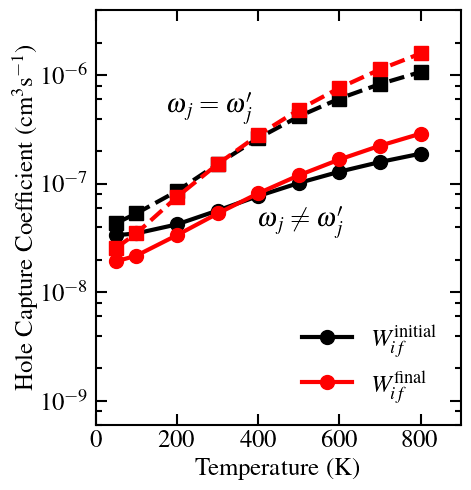

In [15]:
plt.figure(figsize=(5,5))

# Paper figure with smeared results
plt.semilogy(T, Cp_twoFreq_excited, color='black', label='$W_{if}^{\mathrm{initial}}$', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_twoFreq_ground, color='red', label='$W_{if}^{\mathrm{final}}$', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_oneFreq_excited, color='black', linewidth=3, linestyle='dashed', marker='s', markersize=10)
plt.semilogy(T, Cp_oneFreq_ground, color='red', linewidth=3, linestyle='dashed', marker='s', markersize=10)

# Labels
plt.xlabel('Temperature (K)', fontsize=18)
plt.ylabel('Hole Capture Coefficient (cm$^3$s$^{-1}$)', fontsize=18)

plt.text(400, 4e-8, 
         r'$\omega_j \neq \omega_j^{\prime}$', 
         fontsize=19, 
         ha='left',
         color='black')
plt.text(175, 4.5e-7, 
         r'$\omega_j = \omega_j^{\prime}$', 
         fontsize=19, 
         ha='left',
         color='black')

# Plot formatting
plt.legend(loc='lower right', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=18)  # Increase x-axis tick font size
plt.yticks(fontsize=18)  # Increase y-axis tick font size
plt.ylim(6e-10,4e-6)
plt.xlim(0,900)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.tight_layout()
#plt.savefig('EnergyDepAndDiffFreq.png',dpi=1200)
plt.show()

We decided that the lack of sensitivity to the change in eigenvalue splitting, while an interesting result, could cause more questions with the referee. Instead, we only show the effect of allowing the frequencies to change before and after capture.

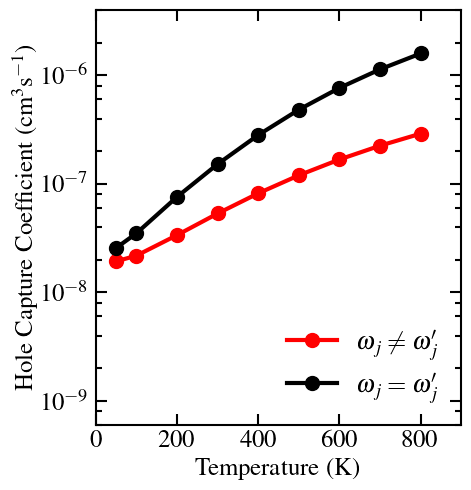

In [16]:
plt.figure(figsize=(5,5))

# Paper figure with smeared results
plt.semilogy(T, Cp_twoFreq_ground, color='red', label=r'$\omega_j \neq \omega_j^{\prime}$', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_oneFreq_ground, color='black', label=r'$\omega_j = \omega_j^{\prime}$', linewidth=3, marker='o', markersize=10)

# Labels
plt.xlabel('Temperature (K)', fontsize=18)
plt.ylabel('Hole Capture Coefficient (cm$^3$s$^{-1}$)', fontsize=18)

# Plot formatting
plt.legend(loc='lower right', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=18)  # Increase x-axis tick font size
plt.yticks(fontsize=18)  # Increase y-axis tick font size
plt.ylim(6e-10,4e-6)
plt.xlim(0,900)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig('DiffFreq.png',dpi=1200)
plt.show()

## Compare Guanzhi's energies vs correct ones

We decided that including the plot with the changes in energy might be confusing because of the stark comparison with the sensitivity observed in the Alkauskas *et al.* paper. But to avoid the referee questioning this large impact because we report the old incorrect numbers and the new correct numbers, we wanted to show that changing only the delta-function energy does have a large impact on the results, but the effects from changing the delta-function energy and the matrix-element energy offset each other so that the energies do not have the large impact that one would think based on the Alkauskas results.

`excitedGuanzhi` represents by best recreation of Guanzhi's numbers using the excited-state energies at the 2x2x2 MP k-points rather than the $\Gamma$ point with the splittings adjusted using the ground-state energies. `mixGuanzhi` is the `excitedGuanzhi` matrix-element energies with the correct/current, ground-state delta-function energies. 

In [5]:
T = np.array([50, 100, 200, 300, 400, 500, 600, 700, 800])
Wif_excitedGuanzhi = np.array([-1.11234116,-0.71234116,-0.62234116])

weight3rdDown_excitedGuanzhi = np.exp(Wif_excitedGuanzhi[0]/(kB*T))
weight2ndDown_excitedGuanzhi = np.exp(Wif_excitedGuanzhi[1]/(kB*T))
weightVBM_excitedGuanzhi = np.exp(Wif_excitedGuanzhi[2]/(kB*T))

totalWeight_excitedGuanzhi = weight3rdDown_excitedGuanzhi + weight2ndDown_excitedGuanzhi + weightVBM_excitedGuanzhi

weight3rdDown_excitedGuanzhi /= totalWeight_excitedGuanzhi
weight2ndDown_excitedGuanzhi /= totalWeight_excitedGuanzhi
weightVBM_excitedGuanzhi /= totalWeight_excitedGuanzhi

In [6]:
Cp_3rdDown_excitedGuanzhi = 4*np.array([1.11555347993340E+011,1.15757129749320E+011,1.46146156554803E+011,2.13033663765873E+011,3.33099950048394E+011,5.27298213241196E+011,8.17542219710922E+011,1.22375665358401E+012,1.76156779786657E+012])*volume*weight3rdDown_excitedGuanzhi
Cp_2ndDown_excitedGuanzhi = 4*np.array([7.18226377741801E+013,7.49196648858721E+013,8.77346824570898E+013,1.06897654871856E+014,1.30769473610548E+014,1.57827069243013E+014,1.86853050644484E+014,2.16957171066713E+014,2.47512036408188E+014])*volume*weight2ndDown_excitedGuanzhi
Cp_VBM_excitedGuanzhi = 4*np.array([3.00104817332307E+013,3.11486591121399E+013,3.57810668427104E+013,4.24470722171458E+013,5.03600614398764E+013,5.89135198136768E+013,6.77094275755231E+013,7.65084107604262E+013,8.51736050272405E+013])*volume*weightVBM_excitedGuanzhi
Cp_excitedGuanzhi = Cp_3rdDown_excitedGuanzhi + Cp_2ndDown_excitedGuanzhi + Cp_VBM_excitedGuanzhi

In [10]:
Cp_3rdDown_mixGuanzhi = 4*np.array([6.64627861326269E+010,6.86798311513395E+010,8.42296242847562E+010,1.18197105173279E+011,1.80162446608396E+011,2.83634338366631E+011,4.44514397976163E+011,6.79394116180475E+011,1.00373643740214E+012])*volume*weight3rdDown_ground
Cp_2ndDown_mixGuanzhi = 4*np.array([5.17931262516268E+012,5.49184921899352E+012,7.23967572497705E+012,1.04633848984997E+013,1.52486261358059E+013,2.16626296211310E+013,2.97213298467386E+013,3.93751323975746E+013,5.05162709742559E+013])*volume*weight2ndDown_ground
Cp_VBM_mixGuanzhi = 4*np.array([1.28219296768775E+012,1.36058584871953E+012,1.82602016040024E+012,2.70189498563590E+012,4.01844262183954E+012,5.80307475308480E+012,8.06576035498379E+012,1.07937641721065E+013,1.39548065262514E+013])*volume*weightVBM_ground
Cp_mixGuanzhi = Cp_3rdDown_mixGuanzhi + Cp_2ndDown_mixGuanzhi + Cp_VBM_mixGuanzhi

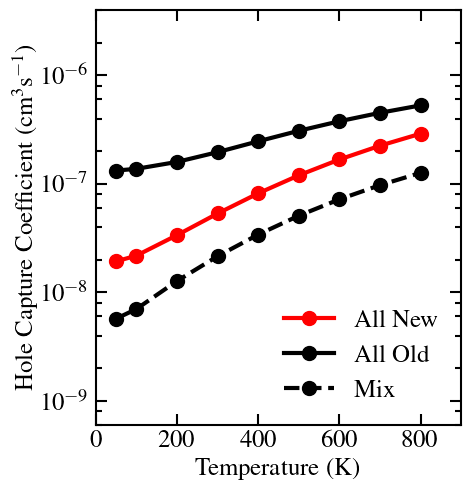

In [21]:
plt.figure(figsize=(5,5))

# Paper figure with smeared results
plt.semilogy(T, Cp_twoFreq_ground, color='red', label='All New', linewidth=3, marker='o', markersize=10)
#plt.semilogy(T, Cp_oneFreq_excitedGuanzhi, color='blue', label='All Old One Freq.', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_excitedGuanzhi, color='black', label='All Old', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_mixGuanzhi, color='black', label='Mix', linestyle='dashed', linewidth=3, marker='o', markersize=10)

# Labels
plt.xlabel('Temperature (K)', fontsize=18)
plt.ylabel('Hole Capture Coefficient (cm$^3$s$^{-1}$)', fontsize=18)

# Plot formatting
plt.legend(loc='lower right', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=18)  # Increase x-axis tick font size
plt.yticks(fontsize=18)  # Increase y-axis tick font size
plt.ylim(6e-10,4e-6)
plt.xlim(0,900)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig('DiffEnergyOldNew.png',dpi=1200)
plt.show()

## Examine each of the individual terms and changes with energy

We saw above that the final results do not change significantly with the energies used, but the energies affect the delta-function energy, the matrix elements, and the Boltzmann weighting. How do each of the individual bands change?

The third band down does not change because it is our reference, but the top two bands two. In the plot below, we show the total result (black) and the results for the VBM (blue) and second band down (red) for the ground-state energies (solid) and excited-state energies (dashed). 

Clearly there is a difference in the overlaps of the top two bands. The red and blue curves have the Bolzmann weighting removed, but they still have the changes in both the matrix elements and the delta-function energy. Each curve is affected differently, but more analysis would be needed to see the sensitivity to each of the different energies. But it seems like by allowing both to change, they offset each other somewhat, which reduces the overall sensitivity to the energy as compared with the observations of Alkauskas *et al.*

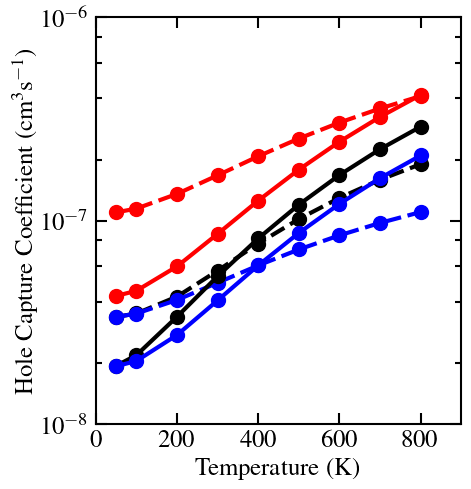

In [8]:
plt.figure(figsize=(5,5))

# Paper figure with smeared results
#plt.semilogy(T, Cp_final, color='black', label='Final Phonons', linewidth=3, marker='s', markersize=10)
#plt.semilogy(T, Cp_initial, color='blue', label='Initial Phonons', linewidth=3, marker='o', markersize=10)
#plt.semilogy(T, Cp_twoFreq_400eV, color='black', label='400 eV', linewidth=3, marker='s', markersize=10)
plt.semilogy(T, Cp_twoFreq_excited, color='black', label='Average', linewidth=3, marker='o', markersize=10,linestyle='dashed')
plt.semilogy(T, Cp_twoFreq_VBM_excited/weightVBM_excited, color='blue', label='VBM', linewidth=3, marker='o', markersize=10, linestyle='dashed')
plt.semilogy(T, Cp_twoFreq_2ndDown_excited/weight2ndDown_excited, color='red', label='2nd Down', linewidth=3, marker='o', markersize=10, linestyle='dashed')
plt.semilogy(T, Cp_twoFreq_3rdDown_excited/weight3rdDown_excited, color='green', label='3rd Down', linewidth=3, marker='o', markersize=10, linestyle='dashed')
plt.semilogy(T, Cp_twoFreq_ground, color='black', label='Average', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_twoFreq_VBM_ground/weightVBM_ground, color='blue', label='VBM', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_twoFreq_2ndDown_ground/weight2ndDown_ground, color='red', label='2nd Down', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_twoFreq_3rdDown_ground/weight3rdDown_ground, color='green', label='3rd Down', linewidth=3, marker='o', markersize=10)
#plt.semilogy(dEPlot[0], sigma1_smeared, color='red', label='First-order', linewidth=3)#, marker='o', markersize=10)

# Raw data
#plt.semilogy(dEPlot, sigma0, color='black', label='Zeroth-order', marker='o', linestyle='', markersize=10)
#plt.semilogy(dEPlot, sigma1, color='red', label='First-order', marker='s', linestyle='', markersize=10)
#plt.plot(dEPlot, sigma0, color='black', label='Raw', marker='s', markersize=10, linestyle='None')

# Labels
plt.xlabel('Temperature (K)', fontsize=18)
plt.ylabel('Hole Capture Coefficient (cm$^3$s$^{-1}$)', fontsize=18)

# Plot formatting
#plt.legend(loc='lower right', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=18)  # Increase x-axis tick font size
plt.yticks(fontsize=18)  # Increase y-axis tick font size
plt.ylim(1e-8,1e-6)
plt.xlim(0,900)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.tight_layout()
#plt.savefig('SiVH3_0th1st_posToNeut_20240229Laura.png',dpi=1200)
plt.show()

## Examine each term and the effect of changing frequency

First check the ground-state energies.

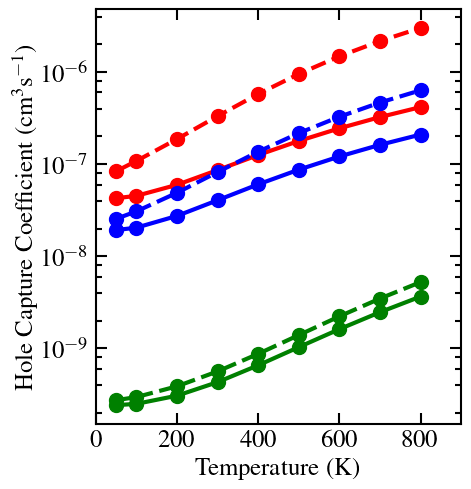

In [16]:
plt.figure(figsize=(5,5))

# Paper figure with smeared results
#plt.semilogy(T, Cp_twoFreq_ground, color='black', label='Average', linewidth=3, marker='o', markersize=10,linestyle='dashed')
plt.semilogy(T, Cp_twoFreq_VBM_ground/weightVBM_ground, color='blue', label='VBM', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_twoFreq_2ndDown_ground/weight2ndDown_ground, color='red', label='2nd Down', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_twoFreq_3rdDown_ground/weight3rdDown_ground, color='green', label='3rd Down', linewidth=3, marker='o', markersize=10)
#plt.semilogy(T, Cp_oneFreq_ground, color='black', label='Average', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_oneFreq_VBM_ground/weightVBM_ground, color='blue', label='VBM', linestyle='dashed', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_oneFreq_2ndDown_ground/weight2ndDown_ground, color='red', label='2nd Down', linestyle='dashed', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_oneFreq_3rdDown_ground/weight3rdDown_ground, color='green', label='3rd Down', linestyle='dashed', linewidth=3, marker='o', markersize=10)

# Raw data
#plt.semilogy(dEPlot, sigma0, color='black', label='Zeroth-order', marker='o', linestyle='', markersize=10)
#plt.semilogy(dEPlot, sigma1, color='red', label='First-order', marker='s', linestyle='', markersize=10)
#plt.plot(dEPlot, sigma0, color='black', label='Raw', marker='s', markersize=10, linestyle='None')

# Labels
plt.xlabel('Temperature (K)', fontsize=18)
plt.ylabel('Hole Capture Coefficient (cm$^3$s$^{-1}$)', fontsize=18)

# Plot formatting
#plt.legend(loc='lower right', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=18)  # Increase x-axis tick font size
plt.yticks(fontsize=18)  # Increase y-axis tick font size
#plt.ylim(1e-8,1e-6)
plt.xlim(0,900)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.tight_layout()
#plt.savefig('SiVH3_0th1st_posToNeut_20240229Laura.png',dpi=1200)
plt.show()

In [17]:
Cp_oneFreq_3rdDown_excitedGuanzhi = 4*np.array([1.24802246163051E+011,1.30056886141210E+011,1.64734198853659E+011,2.39481056623157E+011,3.73384286928331E+011,5.91895770363498E+011,9.22560668776463E+011,1.39070726628834E+012,2.01623668575069E+012])*volume*weight3rdDown_excitedGuanzhi
Cp_oneFreq_2ndDown_excitedGuanzhi = 4*np.array([1.12266242967216E+014,1.22972670232312E+014,1.62426557145546E+014,2.23714391889954E+014,3.03842033523150E+014,3.98148976525368E+014,5.01981040676878E+014,6.11456090441813E+014,7.23653474494358E+014])*volume*weight2ndDown_excitedGuanzhi
Cp_oneFreq_VBM_excitedGuanzhi = 4*np.array([3.40186105103728E+013,3.65168222029230E+013,4.52008777637134E+013,5.71754804411389E+013,7.12693181861235E+013,8.64525171524400E+013,1.02003419184343E+014,1.17480419753851E+014,1.32637136578225E+014])*volume*weightVBM_excitedGuanzhi
Cp_oneFreq_excitedGuanzhi = Cp_oneFreq_3rdDown_excitedGuanzhi + Cp_oneFreq_2ndDown_excitedGuanzhi + Cp_oneFreq_VBM_excitedGuanzhi

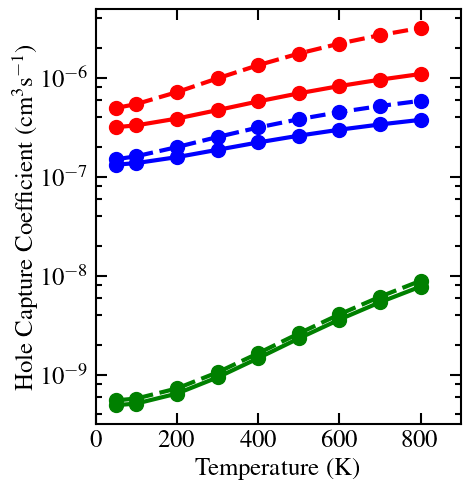

In [18]:
plt.figure(figsize=(5,5))

# Paper figure with smeared results
#plt.semilogy(T, Cp_twoFreq_ground, color='black', label='Average', linewidth=3, marker='o', markersize=10,linestyle='dashed')
plt.semilogy(T, Cp_VBM_excitedGuanzhi/weightVBM_excitedGuanzhi, color='blue', label='VBM', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_2ndDown_excitedGuanzhi/weight2ndDown_excitedGuanzhi, color='red', label='2nd Down', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_3rdDown_excitedGuanzhi/weight3rdDown_excitedGuanzhi, color='green', label='3rd Down', linewidth=3, marker='o', markersize=10)
#plt.semilogy(T, Cp_oneFreq_ground, color='black', label='Average', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_oneFreq_VBM_excitedGuanzhi/weightVBM_excitedGuanzhi, color='blue', label='VBM', linestyle='dashed', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_oneFreq_2ndDown_excitedGuanzhi/weight2ndDown_excitedGuanzhi, color='red', label='2nd Down', linestyle='dashed', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_oneFreq_3rdDown_excitedGuanzhi/weight3rdDown_excitedGuanzhi, color='green', label='3rd Down', linestyle='dashed', linewidth=3, marker='o', markersize=10)

# Raw data
#plt.semilogy(dEPlot, sigma0, color='black', label='Zeroth-order', marker='o', linestyle='', markersize=10)
#plt.semilogy(dEPlot, sigma1, color='red', label='First-order', marker='s', linestyle='', markersize=10)
#plt.plot(dEPlot, sigma0, color='black', label='Raw', marker='s', markersize=10, linestyle='None')

# Labels
plt.xlabel('Temperature (K)', fontsize=18)
plt.ylabel('Hole Capture Coefficient (cm$^3$s$^{-1}$)', fontsize=18)

# Plot formatting
#plt.legend(loc='lower right', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=18)  # Increase x-axis tick font size
plt.yticks(fontsize=18)  # Increase y-axis tick font size
#plt.ylim(1e-8,1e-6)
plt.xlim(0,900)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.tight_layout()
#plt.savefig('SiVH3_0th1st_posToNeut_20240229Laura.png',dpi=1200)
plt.show()

## Effect of $S_j$ threshold

We have all modes included here, but what is the effect of setting a threshold on $S_j$ for the modes allowed to contribute?

First, plot the results from the code without the threshold and the code with a threshold of zero to ensure that the results are the same.

In [21]:
Cp_3rdDown_thresh0 = 4*np.array([5.47521671932563E+010,5.65787350858041E+010,6.93901539824758E+010,9.73762505858087E+010,1.48429961715289E+011,2.33680078946788E+011,3.66225892233090E+011,5.59734000354969E+011,8.26940326043841E+011])*volume*weight3rdDown_ground
Cp_2ndDown_thresh0 = 4*np.array([9.65433513182484E+012,1.02368948824296E+013,1.34947688551803E+013,1.95035718273578E+013,2.84229064530160E+013,4.03780326839810E+013,5.53985947297209E+013,7.33921033294616E+013,9.41576557922128E+013])*volume*weight2ndDown_ground
Cp_VBM_thresh0 = 4*np.array([4.35602833508037E+012,4.62234765397170E+012,6.20352579364201E+012,9.17903180644467E+012,1.36515476829523E+013,1.97141658849635E+013,2.74007205419992E+013,3.66679205654846E+013,4.74060881882918E+013])*volume*weightVBM_ground
Cp_thresh0 = Cp_twoFreq_3rdDown_ground + Cp_twoFreq_2ndDown_ground + Cp_twoFreq_VBM_ground

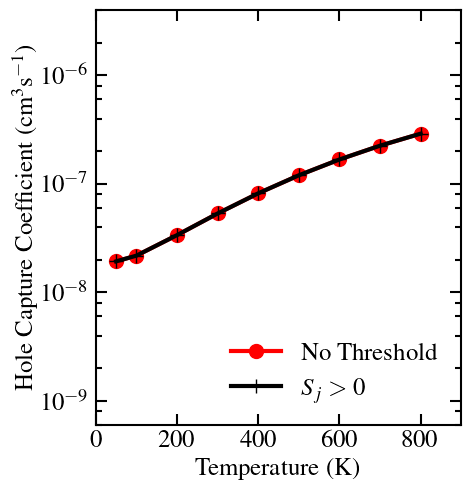

In [22]:
plt.figure(figsize=(5,5))

# Paper figure with smeared results
plt.semilogy(T, Cp_twoFreq_ground, color='red', label='No Threshold', linewidth=3, marker='o', markersize=10)
plt.semilogy(T, Cp_thresh0, color='black', label='$S_j > 0$', linewidth=3, marker='+', markersize=10)

# Labels
plt.xlabel('Temperature (K)', fontsize=18)
plt.ylabel('Hole Capture Coefficient (cm$^3$s$^{-1}$)', fontsize=18)

# Plot formatting
plt.legend(loc='lower right', fontsize=18, frameon=False)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=18)  # Increase x-axis tick font size
plt.yticks(fontsize=18)  # Increase y-axis tick font size
plt.ylim(6e-10,4e-6)
plt.xlim(0,900)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.tight_layout()
#plt.savefig('ZerothTDep.png',dpi=1200)
plt.show()

## Nonequilibrium

There is also the case where the carrier is coming far from the defect. In that case, the perfect-crystal eigenvalues should be used and both the zeroth-order and first-order terms are present.

Below is our attempt to generate this plot, but the results are not meaningful because we decreased the smearing. The results should actually be smeared more because we have so few k-points, but that washes out all of the results. We really need more k-points, but we decided such a calculation was outside the scope of this paper.

In [48]:
def gaussian(x, sigma, mu):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

def gaussian_smearing_with_vg(x, xRaw, y, sigmas,scale):
    smeared_y = np.zeros_like(x)
    for i, xi in enumerate(x):
        new_y = 0
        tot_wt = 0
        for y_i, sigma, mu in zip(y, sigmas, xRaw):
            if sigma != 0:
                wt = gaussian(xi, sigma, mu)
            else:
                wt = 0.0
            new_y += wt * y_i
            tot_wt += wt
        smeared_y[i] = new_y / tot_wt
    return smeared_y

In [62]:
dERaw = np.array([0.4, 0.42, 0.42, 0.95, 0.95, 1.0, 1.0, 1.01, 1.01, 1.15, 1.15, 1.35, 1.35])

vgx = np.array([4.39E+07,
                -4.39E+07,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0])
vgx = np.flip(vgx)

vgy = np.array([0.0,
                0.0,
                4.12E+07,
                -4.12E+07,
                0.0,
                0.0,
                0.0,
                0.0,
                2.32E+07,
                -2.32E+07,
                0.0,
                0.0,
                0.0])
vgy = np.flip(vgy)

vgz = np.array([0.0,
                0.0,
                0.0,
                0.0,
                -2.24E+07,
                2.24E+07,
                2.24E+07,
                -2.24E+07,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0])
vgz = np.flip(vgz)

vg = np.sqrt(vgx**2 + vgy**2 + vgz**2)

crossSection0 = 4*np.array([9.73890893198417E+009,
                         3.61577028776290E+010,
                         1.28948155147984E+011,
                         1.28271275378051E+011,
                         1.77804624833646E+011,
                         1.13382169109037E+012,
                         2.43449998147371E+011,
                         2.34327079359469E+011,
                         8.05189279709453E+007,
                         3.03050318544138E+006,
                         5.58181282416599E+013,
                         3.03120851400464E+013,
                         8.68519034255258E+012])*volume/vg

crossSection0 = np.flip(crossSection0)
crossSection0[crossSection0 == np.inf] = 0.0

crossSection1 = 4*np.array([1.72861634735924E+011,
                         7.02685118791779E+010,
                         2.39235124651414E+010,
                         1.23688354770092E+010,
                         8.62786785309288E+009,
                         3.84139511317658E+009,
                         1.04352359306451E+010,
                         6.58548109423760E+009,
                         1.59459102529444E+012,
                         6.76222563986211E+011,
                         3.80926651479733E+012,
                         1.69468652137556E+013,
                         3.02655827676444E+012])*volume/vg

crossSection1 = np.flip(crossSection1)
crossSection1[crossSection1 == np.inf] = 0.0

/tmp/ipykernel_359/3119622091.py:50: RuntimeWarning: divide by zero encountered in divide
  crossSection0 = 4*np.array([9.73890893198417E+009,
/tmp/ipykernel_359/3119622091.py:67: RuntimeWarning: divide by zero encountered in divide
  crossSection1 = 4*np.array([1.72861634735924E+011,


In [79]:
scale = 0.15
# Calculate sigmas based on group velocities
sigmas_x = np.array([HBAR * vg * DK[0]*scale for vg in vgx])
sigmas_y = np.array([HBAR * vg * DK[1]*scale for vg in vgy])
sigmas_z = np.array([HBAR * vg * DK[2]*scale for vg in vgz])
sigmas = np.sqrt(sigmas_x**2+sigmas_y**2+sigmas_z**2)

dEPlot = np.linspace(np.min(dERaw),np.max(dERaw))

crossSection0_smeared = gaussian_smearing_with_vg(dEPlot, dERaw, crossSection0, sigmas, scale)

crossSection1_smeared = gaussian_smearing_with_vg(dEPlot, dERaw, crossSection1, sigmas, scale)
sigmas

array([0.        , 0.        , 0.        , 0.12983039, 0.12983039,
       0.13386889, 0.13386889, 0.13386889, 0.13386889, 0.23056086,
       0.23056086, 0.28367579, 0.28367579])

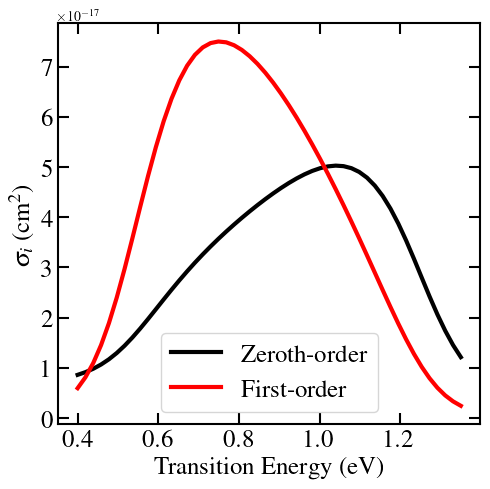

In [84]:
plt.figure(figsize=(5,5))

# Paper figure with smeared results
#plt.semilogy(T, Cp_twoFreq, color='red', label='Both Phonons', linewidth=3, marker='^', markersize=10)
#plt.semilogy(T, Cp_twoFreq_eigMix, color='red', label='Both Phonons Mix Eigs', linewidth=3, linestyle='dashed', marker='^', markersize=10)
#plt.semilogy(dEPlot[0], sigma1_smeared, color='red', label='First-order', linewidth=3)#, marker='o', markersize=10)
plt.plot(dEPlot, crossSection0_smeared, color='black', label='Zeroth-order', linewidth=3)#, marker='o', markersize=10)
plt.plot(dEPlot, crossSection1_smeared, color='red', label='First-order', linewidth=3)#, marker='o', markersize=10)

# Raw data
#plt.semilogy(dEPlot, Cp_noneq_0, color='black', label='Zeroth-order', linestyle='', marker='o', markersize=10)
#plt.semilogy(dEPlot, Cp_noneq_1, color='red', label='First-order', linestyle='', marker='s', markersize=10)
#plt.plot(dEPlot, sigma0, color='black', label='Raw', marker='s', markersize=10, linestyle='None')

# Labels
plt.xlabel('Transition Energy (eV)', fontsize=18)
plt.ylabel('$\sigma_i$ (cm$^2$)', fontsize=18)

# Plot formatting
plt.legend(loc='best', fontsize=18, frameon=True)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=18)  # Increase x-axis tick font size
plt.yticks(fontsize=18)  # Increase y-axis tick font size
#plt.ylim(1e-18,1e-16)
#plt.xlim(0,900)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
#locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
#ax.yaxis.set_minor_locator(locmin)
#ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.tight_layout()
#plt.savefig('SiVH3_0th1st_posToNeut_20240229Laura.png',dpi=1200)
plt.show()

In [68]:
crossSection0

array([8.74159788e-16, 3.05089525e-15, 5.98623907e-15, 3.25007612e-22,
       1.58827599e-20, 4.62221844e-17, 4.80217256e-17, 2.23651980e-16,
       3.38634399e-17, 2.44296605e-17, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [85]:
0.1/DK/HBAR

array([2321311.93315072, 2680420.21493982, 2509918.45563841])